<a href="https://colab.research.google.com/github/Boltfox/FFA_tutorial/blob/master/revis_pulsar_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to search for a pulsar #

by Jompoj Wongphechauxsorn, MPIfR, Bonn, Germany.

In [1]:
#@title Install riptide,a python module for the FFA
!pip install riptide-ffa #first we need to install a python package for the FFA (For more information: https://arxiv.org/abs/2004.03701)

     |████████████████████████████████| 92kB 2.8MB/s 
     |████████████████████████████████| 235kB 9.8MB/s 
  Created wheel for riptide-ffa: filename=riptide_ffa-0.1.3-cp36-none-any.whl size=64151 sha256=951b8cae3b24cf01e8c3b21d6857c397d190af99a0f38597844a5a358fad5d43
  Stored in directory: /root/.cache/pip/wheels/e1/37/07/a67012acea36ebd726d9352d0d16b8bd73f9e0ba942cbe5857
Successfully built riptide-ffa
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [0]:
#@title import other modules
import riptide
import numpy as np
import scipy 
import matplotlib.pyplot as plt

%matplotlib inline


## The Single pulse search

Pulsars are detectable as a periodic signal from the sky. The easiest way is to search for any strong signal.

Text(0.5, 0, 'Time(s)')

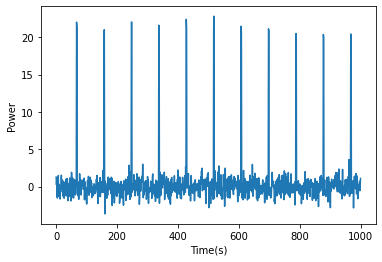

In [7]:
t_obs=1000 #Observation time
snr=100
tseries_fake = riptide.TimeSeries.generate(length=t_obs, tsamp=1, period=90, ducy=0.01,amplitude=snr,phi0=0.75)
tsamping=np.arange(0,t_obs,1)
plt.plot(tsamping,tseries_fake.data)

plt.ylabel("Power")
plt.xlabel("Time(s)")

This is the easiest way to search for a pulsar by looking for a single pulse. However, this method requires the signal to be brighter than the noise. One can implement an algorithm to search for this signal easily, using the method called "The Single pulse search."



---


Quiz 1:

1.1.   Can you see any strong signal? How long until the signal arrives at the telescope after being observed? 



1.2.   If the duration of the observation is adjusted to 1000s, can you still trust your observation? Why?


---



## Using the Fourier transform

The Fourier transform was invented 1882. This operation is basically trying to describe some function as an infinite sum of harmonics (frequencies).

Here we are interested in a periodic function. The simplest periodic function we know is $y=Asin(2\pi fx)$, while f is a frequency of this function and A is the amplitude. Let's generate this function in python.

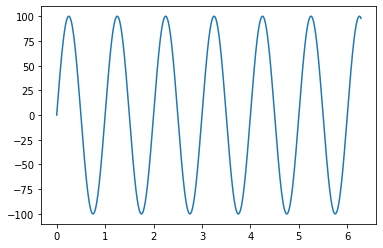

In [8]:
t=np.arange(0,1*2*np.pi,0.00001)
y1=100*np.sin(2*np.pi*t)
plt.plot(t,y1)

Another kind of periodic function that we know is y=Acos(2πfx)

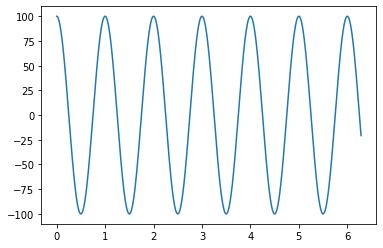

In [12]:
y2=100*np.cos(2*np.pi*t)
plt.plot(t,y2)


So, basically, $y=sin(x)$ and $y=cos(x)$ is basically the same function with a difference "phase".

The last function we are going to use here is the "step function".

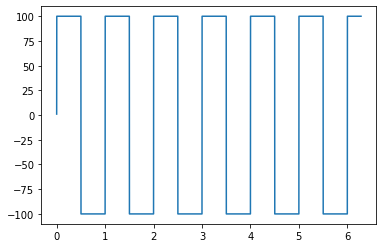

In [14]:
y=np.zeros(628319)-100.0

for i in range(0,len(y)):
  if (i%100000<=100000-50000):
    #print(i)
    y[i]=100
y[0]=1

plt.plot(t,y)

All of them have the frequency of 1 Hz. What happend if we combine all of them ? let's do that !! 

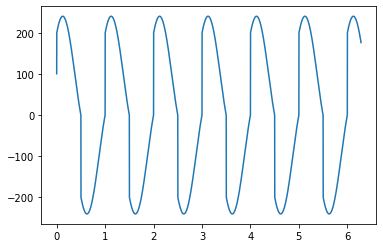

In [15]:
plt.plot(t,y1+y2+y)

Let's generate another $y=cos(x)$ function with a frequency of 25 Hz. 

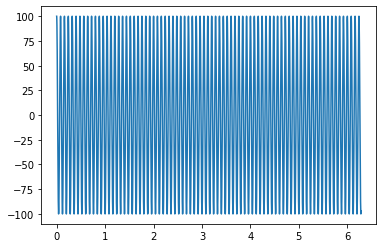

In [16]:
y3=100*np.cos(25*np.pi*t)
plt.plot(t,y3)

If we combine all of them together, this is what the summation look like.

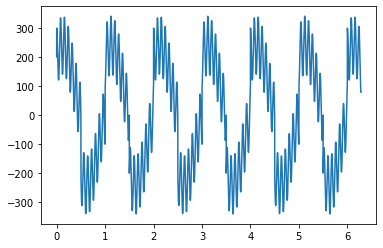

In [17]:
plt.plot(t,y1+y+y2+y3)

As I told you before, the Fourier transform is just the way to explain any function as an infinite sum of harmonics. Let's apply the Fourier transform to all of the function.

[0.00000000e+00 3.18310155e-01 6.36620310e-01 ... 9.99993634e+04
 9.99996817e+04 1.00000000e+05]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


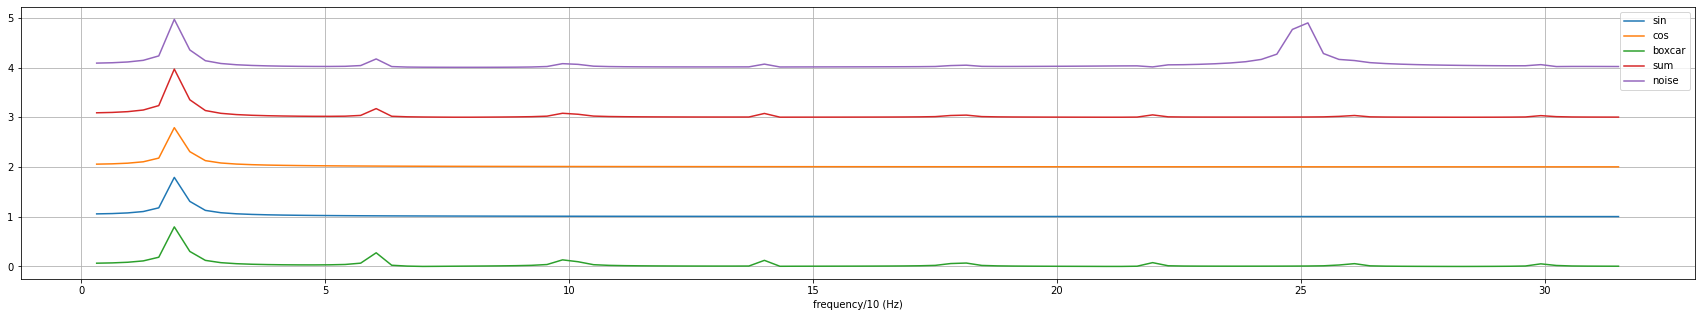

In [19]:
fft_data=np.fft.fft(y)
fft_datasin=np.fft.fft(y1)
fft_datacos=np.fft.fft(y1)
fft_datasum=np.fft.fft(y1+y+y2)
fft_datasumnoise=np.fft.fft(y1+y+y2+3*y3)
fs=200000
N=int(len(fft_data))

N_freq = int(len(fft_data)/2+1)
freq = np.linspace(0, fs/2, N_freq) #Create frequency range as in the Nyquist theorem

print(freq)
plt.plot(freq[1:100],np.abs(fft_datasin[1:100])/fft_datasin.max()+1,label="sin")
plt.plot(freq[1:100],np.abs(fft_datacos[1:100])/fft_datacos.max()+2,label="cos")
plt.plot(freq[1:100],np.abs(fft_data[1:100])/fft_data.max(),label="boxcar")
plt.plot(freq[1:100],np.abs(fft_datasum[1:100])/fft_datasum.max()+3,label="sum")
plt.plot(freq[1:100],np.abs(fft_datasumnoise[1:100])/fft_datasumnoise.max()+4,label="noise")
plt.rcParams['figure.figsize'] = [50, 5]
plt.xlabel("frequency/10 (Hz)")
plt.legend()
plt.grid()
#print("The signal is found at the period of:",1/freq[np.where(np.abs(fft_data)[1:10000]==np.abs(fft_data)[1:10000].max())[0]])

The plot above is called "Fourier spectrum" (a relation between Fourier amplitude and frequency). You can see that all of the function show a peak at 1Hz despite their different shape. So, **the Fourier transform can be used to search for a period in any periodic signal by searching for the frequency with the highest amplitude in Fourier spectrum**. 

## The Fast Fourier tranform (FFT)

The FFT is a faster version of the Fourier tranform for discrese data.The FFT (the Fast Fourier tranform) has been used to search for most of the known pulsars. However, the FFT has some disadventage, to understand that let's simulate two timeseries with a different width of 50% and 5%.

Text(0.5, 0, 'Time(s)')

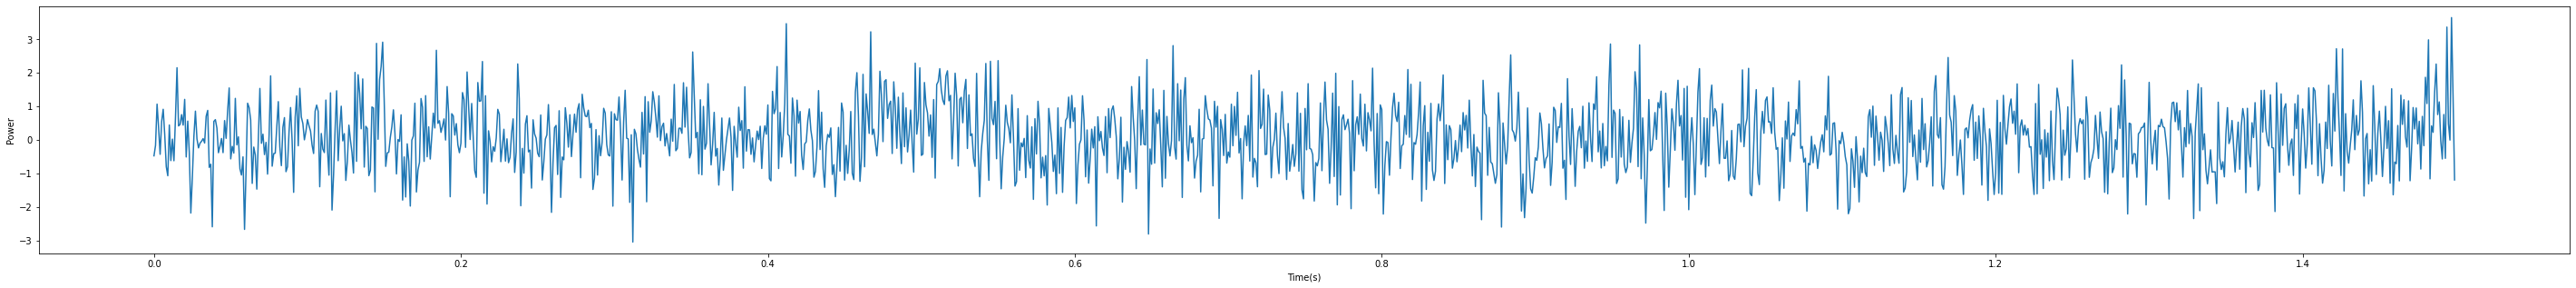

In [22]:
P_f=1.0 #signal period
ampli=250 #signal S/N
spt=0.001 #sampling time
t_obs=1800.0 #data lenght in second
tseries_fake = riptide.TimeSeries.generate(length=t_obs, tsamp=spt, period=P_f, ducy=0.5,amplitude=ampli,phi0=0.5)
tseries_fake_narrow = riptide.TimeSeries.generate(length=t_obs, tsamp=spt, period=P_f, ducy=0.05,amplitude=ampli,phi0=0.5)
tsamping=np.arange(0,t_obs,spt)
plt.plot(tsamping[:1500],tseries_fake_narrow.data[:1500]) #plot the first 1.5s
plt.ylabel("Power")
plt.xlabel("Time(s)")

This is what an actual timeseries look like. It is impossible to see the signal because it is below the noise floor. Assuming that the noise power can be described by the Gaussian distribution, the signal will be stronger after being edited accordingly. 

1000.0 1800 (1800000,)


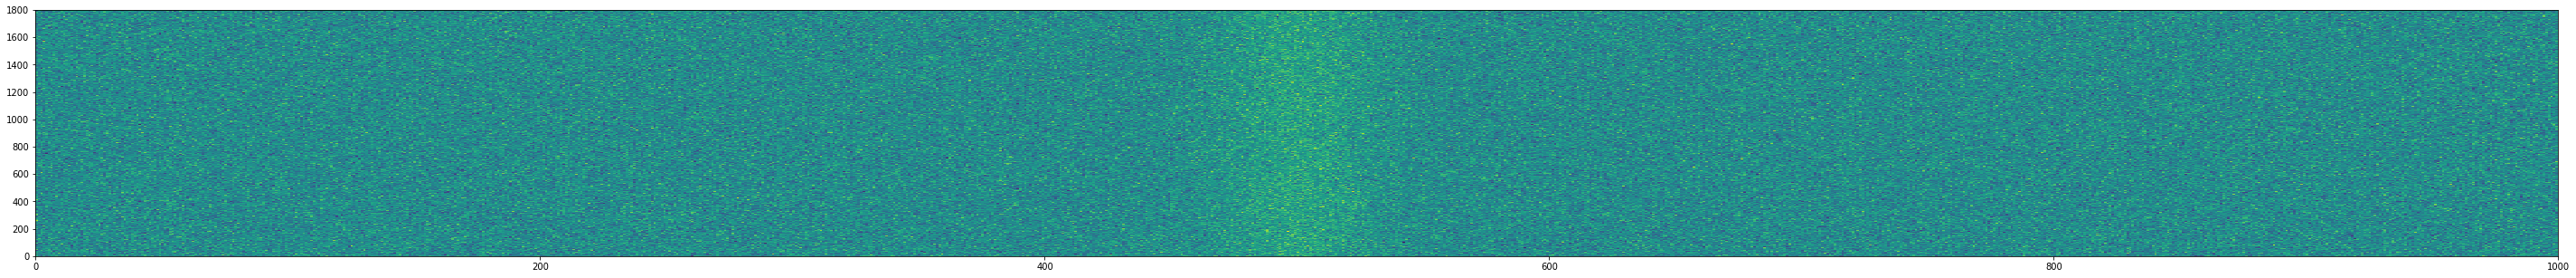

In [23]:
P_bin=P_f/spt #Calculate the period as number of bins
shape_=tseries_fake_narrow.data.shape
subint=int(shape_[0]/P_bin) 
new_data=tseries_fake_narrow.data[:int(P_bin)*subint].reshape(subint,int(P_bin)) #reshape the data
print(P_bin,subint,shape_)
plt.pcolormesh(new_data)


Right now, the data is easier detectable by eyes. One can go further by folding (sum) the whole observation.

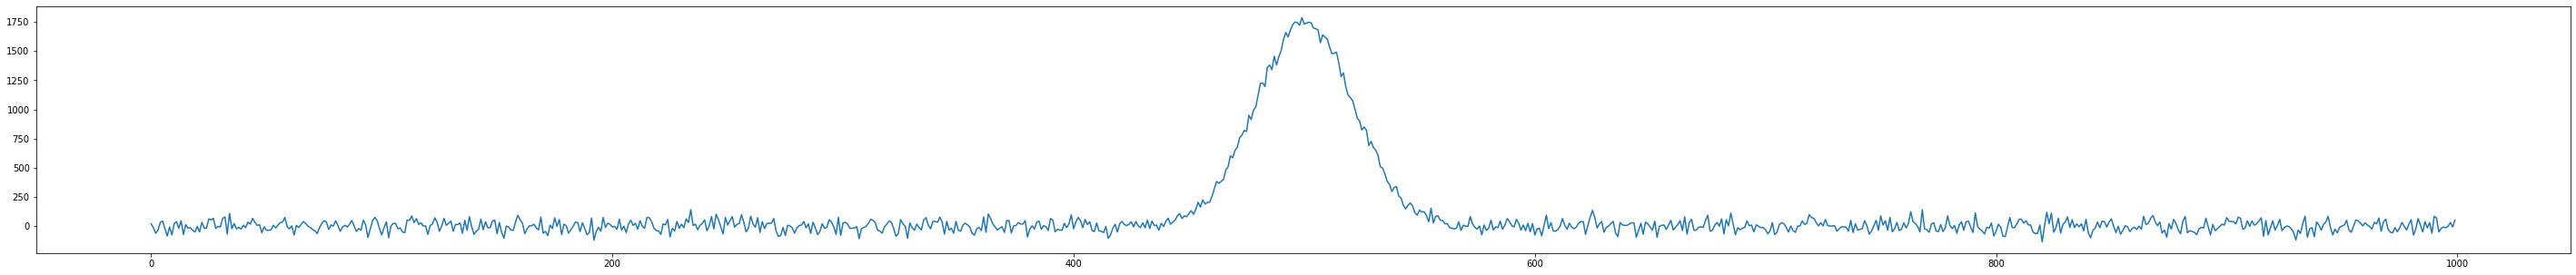

In [24]:
plt.plot(new_data.sum(0))

Let's assume that the period is wrong by a factor of 1.005.

1000.9999999999999 1798 (1800000,)


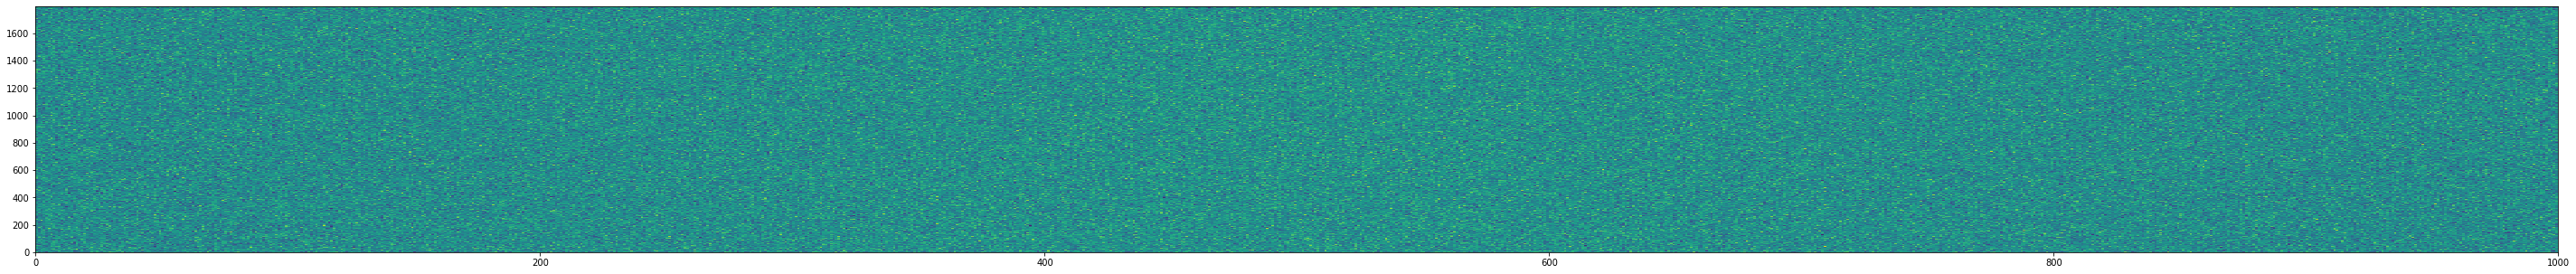

In [29]:
P_bin=P_f/spt*1.001
shape_=tseries_fake.data.shape
subint=int(shape_[0]/P_bin)
new_data=tseries_fake.data[:int(P_bin)*subint].reshape(subint,int(P_bin))
print(P_bin,subint,shape_)
plt.pcolormesh(new_data)

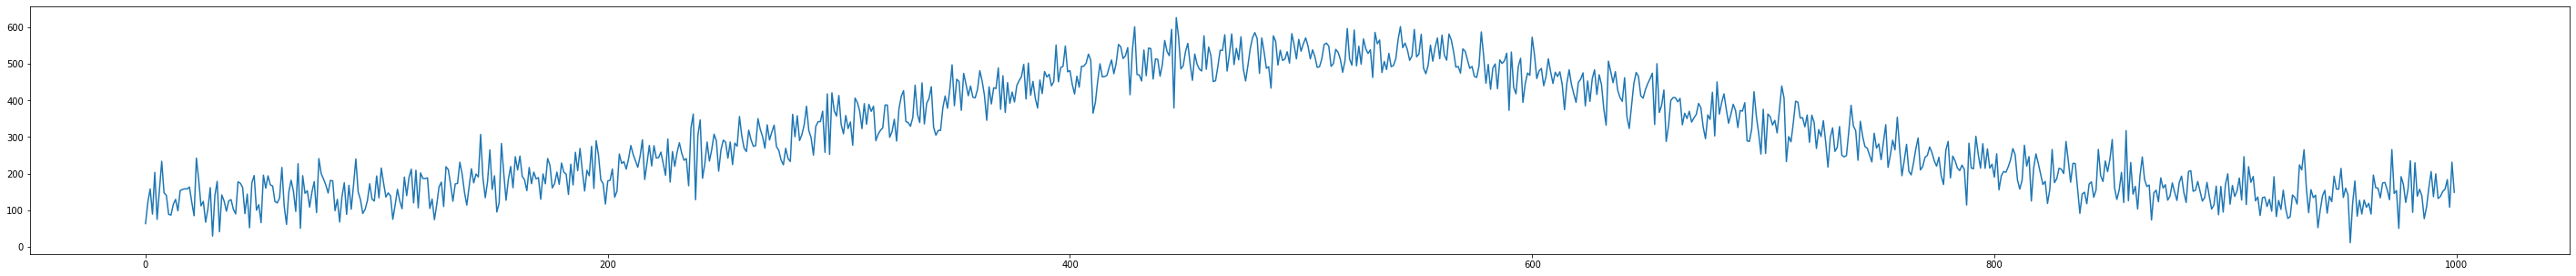

In [30]:
plt.plot(new_data.sum(0))

To summerise the folding algorithm.

![alt text](https://www.overleaf.com/project/5ea42101f2c0540001be3cc4/file/5ea42106f2c0540001be3d23)

Identifying the period is crucial in pulsar detection. However, folding all possible periods is too computational expensive.  the FFT has been use to find the period. 



---


Quiz 2)

 2.1) Can you still see the signal if we guess the period wrong by a factor of 1.005 ? 

 2.2) Do you think using "sum" can be applied to the real data? Why?


---


 

Let's apply the FFT to both timeseries. For more information why the FFT can be used to search for a period in a signal, please visit https://www.youtube.com/watch?v=spUNpyF58BY.

The signal is found at the period of: [1.00055586]


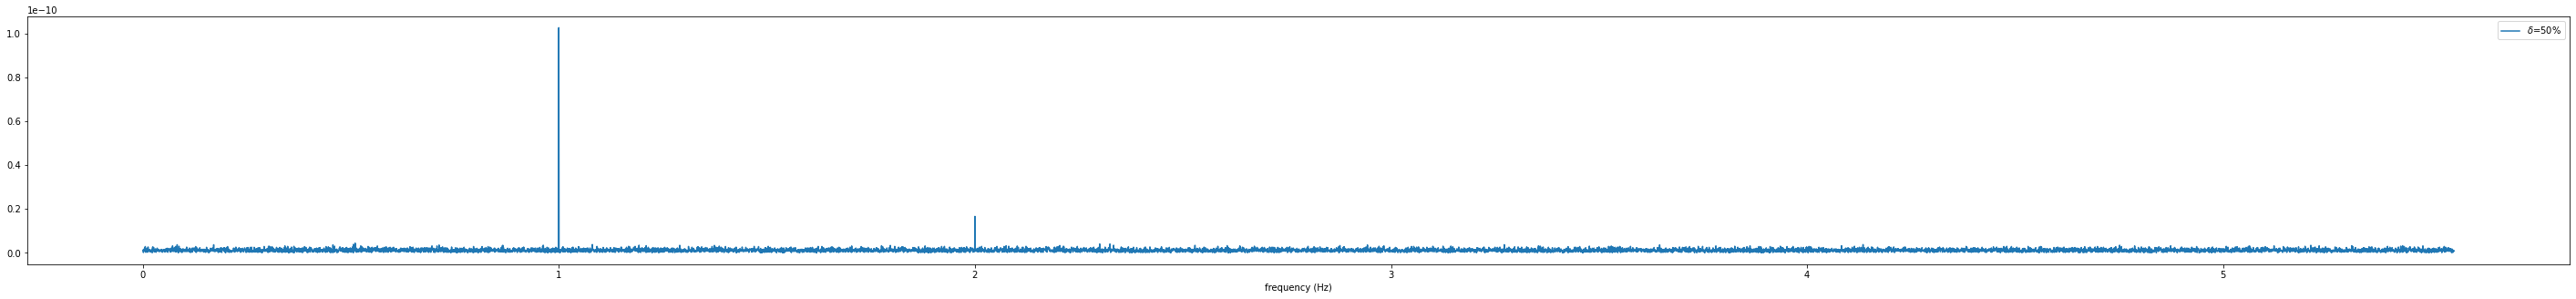

In [31]:
fft_data=np.fft.fft(tseries_fake.data)
fft_data_narrow=np.fft.fft(tseries_fake_narrow.data)
fs=1.0/spt
N=int(t_obs/spt)

N_freq = int(len(fft_data)/2+1)
freq = np.linspace(0, fs/2, N_freq, endpoint=True) #Create frequency range as in the Nyquist theorem


plt.plot(freq[1:10000],np.abs(fft_data)[1:10000]*2/N_freq/np.abs(fft_data_narrow).sum(),label="$\delta$=50%")
plt.rcParams['figure.figsize'] = [30, 5]
plt.xlabel("frequency (Hz)")
plt.legend()
print("The signal is found at the period of:",1/freq[np.where(np.abs(fft_data)[1:10000]==np.abs(fft_data)[1:10000].max())[0]])

The result called "Fourier spectrum". The most possible frequency is coressponings the frequency with the higest amplitude. We can now "fold" the data with the corespondings period. ()

1000.5558643690939 1799 (1800000,)


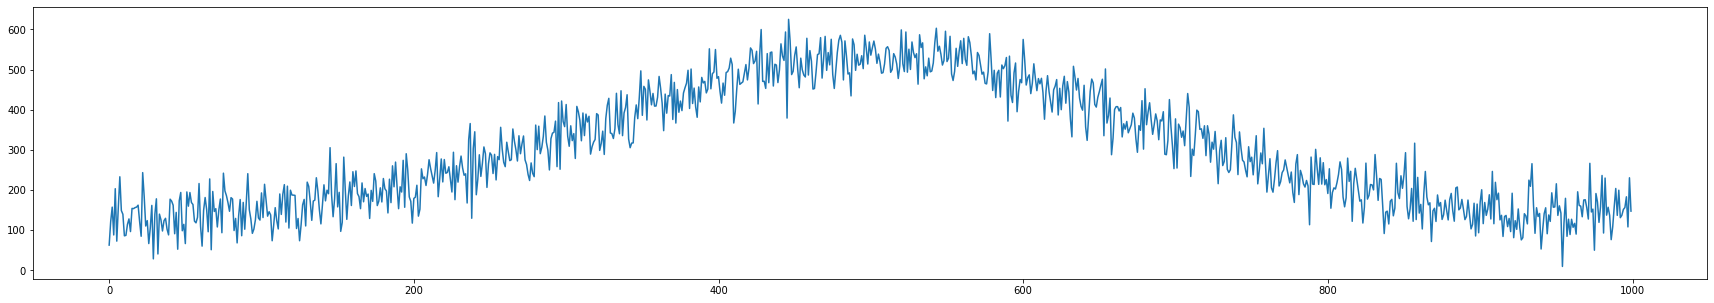

In [32]:
P_bin=1/freq[np.where(np.abs(fft_data)[1:10000]==np.abs(fft_data)[1:10000].max())[0]][0]/spt
shape_=tseries_fake.data.shape
subint=int(shape_[0]/P_bin)
new_data=tseries_fake.data[:int(P_bin)*subint].reshape(subint,int(P_bin))
print(P_bin,subint,shape_)
plt.plot(new_data.sum(axis=0))

The signal is found at the period of: [1.00055586]


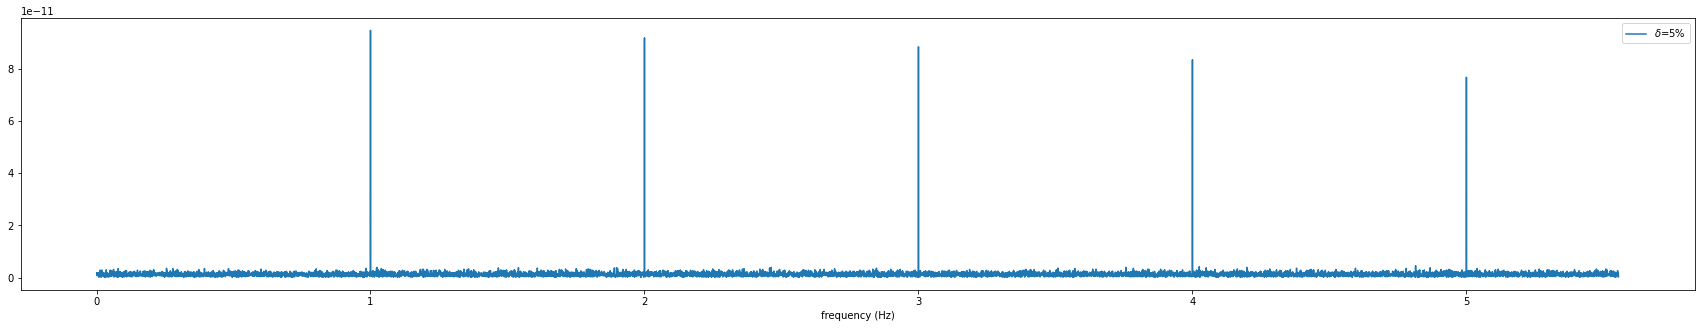

In [33]:
plt.plot(freq[1:10000],np.abs(fft_data_narrow)[1:10000]*2/N_freq/np.abs(fft_data_narrow).sum(), label="$\delta$=5%")
plt.rcParams['figure.figsize'] = [30, 5]
plt.xlabel("frequency (Hz)")
plt.legend()
print("The signal is found at the period of:",1/freq[np.where(np.abs(fft_data)[1:10000]==np.abs(fft_data)[1:10000].max())[0]])

We can now "fold" the data with the corespondings period.

1000.5558643690939 1799 (1800000,)


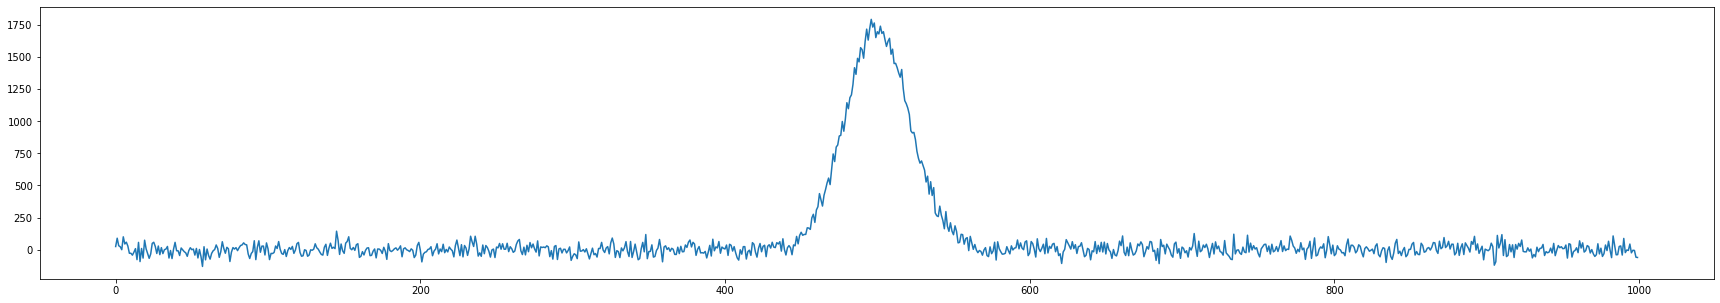

In [0]:
P_bin=1/freq[np.where(np.abs(fft_data_narrow)[1:10000]==np.abs(fft_data_narrow)[1:10000].max())[0]][0]/spt
shape_=tseries_fake.data.shape
subint=int(shape_[0]/P_bin)
new_data=tseries_fake_narrow.data[:int(P_bin)*subint].reshape(subint,int(P_bin))
print(P_bin,subint,shape_)
plt.plot(new_data.sum(axis=0))



---


Quiz 2)

 2.3) What is the difference between the narrow pulse signal and the broad pulse signal in Fourier space? Which kind of signal is easier (the Furier power is stronger) to detect using the FFT? Why? 

 2.4) Which kind of pulsar is harder to detect using the FFT?  


---



 

## The Fast folding algorithm



Inspired by the FFT, the FFA is implemented in 1969 (https://ieeexplore.ieee.org/document/1448981). It has been rarely used to search for pulsar due to it is computationally expensive. As computing power is getting better, we can use the FFA on an actual data right now. We are using the same data from the last chapter.

Start with the broad pulse signal. 

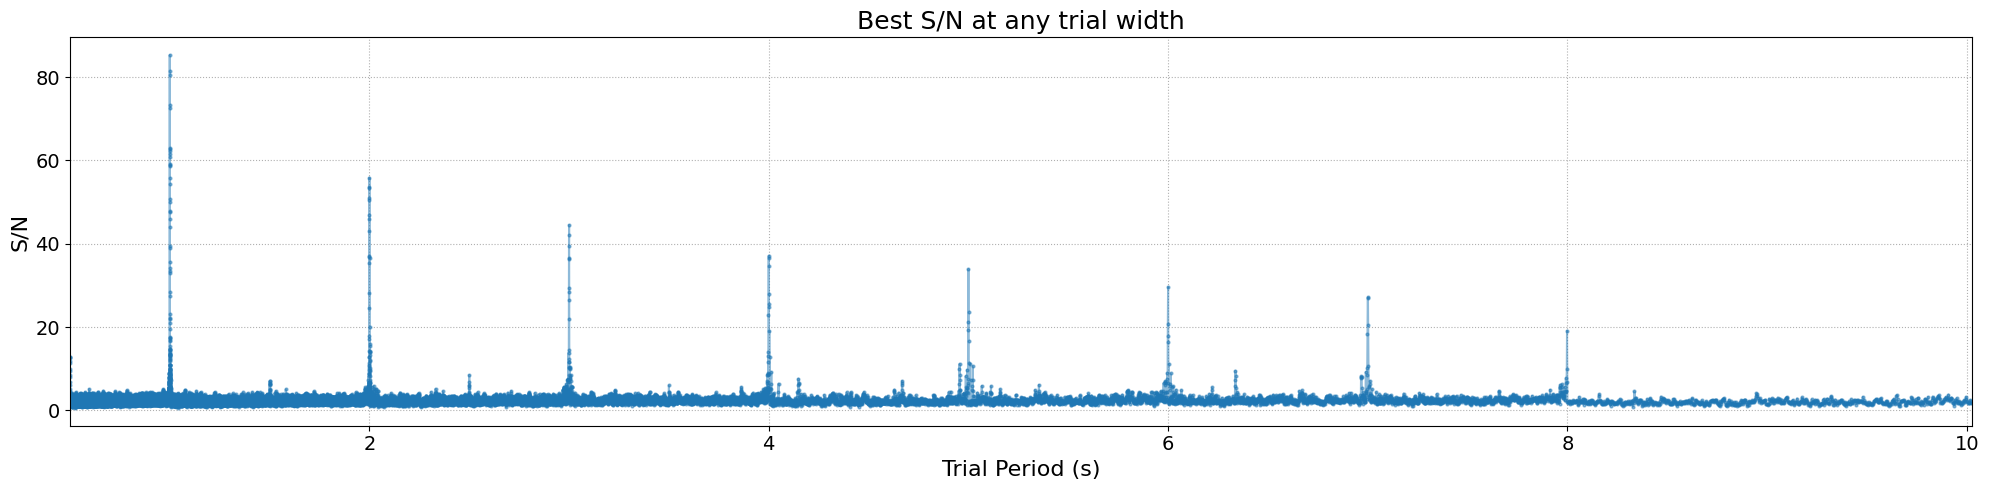

In [34]:
ts, plan, pgram = riptide.ffa_search(tseries_fake, rmed_width=4.0, period_min=0.5, period_max=10.0, bins_min=16, bins_max=32)
pgram.display()
cand_b=riptide.peak_detection.find_peaks(pgram)

And the narrow pulse signal.

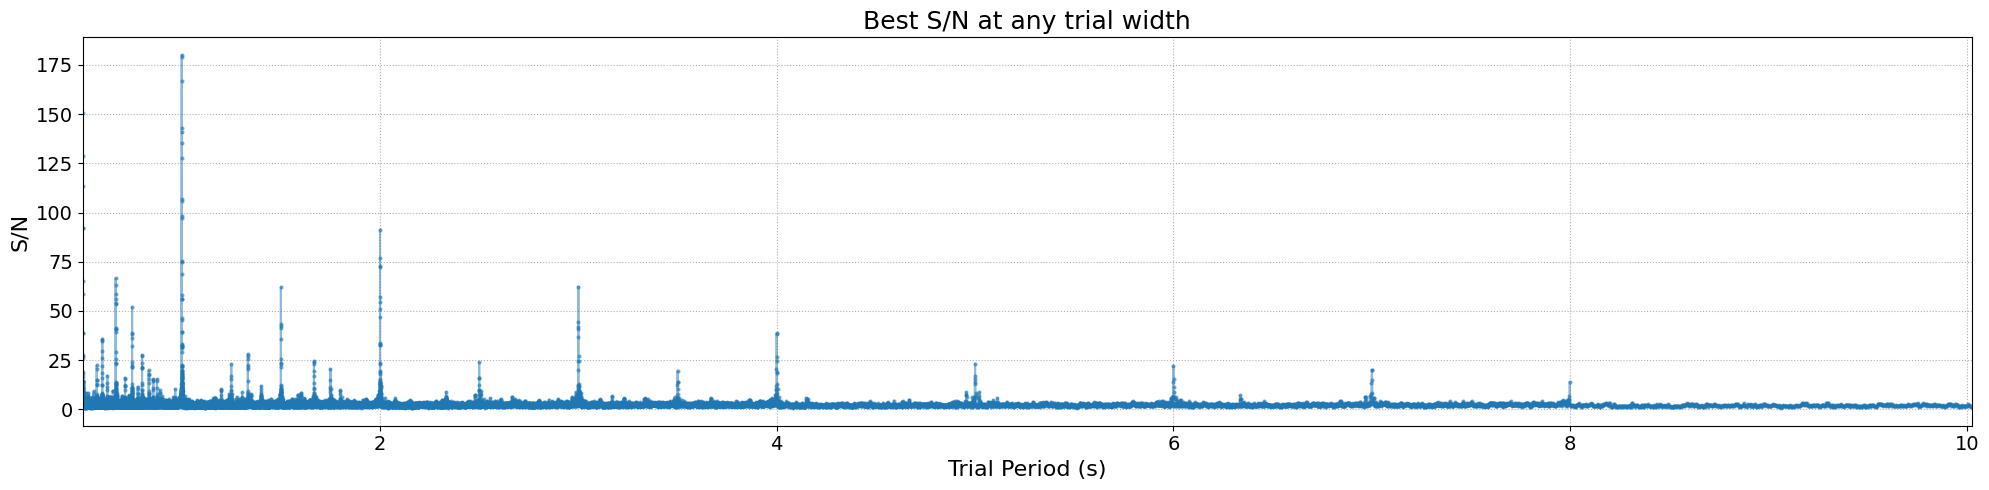

In [35]:
ts, plan, pgram = riptide.ffa_search(tseries_fake_narrow, rmed_width=4.0, period_min=0.5, period_max=10.0, bins_min=16, bins_max=32)
pgram.display()
cand_n=riptide.peak_detection.find_peaks(pgram)


In [36]:
best_can_b=0
best_cand_bsnr=0
for i in cand_b[0]:
  #print(i)
  if best_cand_bsnr<i.snr:
    #print(i.snr)
    best_can_b=i
    best_cand_bsnr=i.snr
print(best_can_b)

Peak(period=1.0, freq=1.0, width=4, ducy=0.17391304347826086, iw=3, ip=39027, snr=85.32389831542969, dm=None)


In [37]:

best_can_n=0
best_cand_snnr=0
for i in cand_n[0]:
  #print(i)
  if best_cand_snnr<i.snr:
    #print(i.snr)
    best_can_n=i
    best_cand_snnr=i.snr
print(best_can_n)

Peak(period=0.9999653113000884, freq=1.0000346899032593, width=3, ducy=0.13043478260869565, iw=2, ip=39026, snr=180.02967834472656, dm=None)




---


Quiz 3)

 3.1) What is the different between narrow pulse signal and broad pulse signal in Periodogram? Which kind of signal is easier to detect using the FFA? Why? 


**Summary:**

  The FFT has been used to discover most pulsars in the sky despite its lack of sensitivity on slow pulsars.
  The FFA is a algorithm to compromise that disadventage. The FFA might leads to a new population of pulsar.
  Astrophysics is also computationally challenging !!!